In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

There is a huge dataset for 120 years worth of Olympic data that has been generated and released to the public (see: https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results). It contains information such as name, age, height, weight, city, event, etc. However, I noticed that these Olympic datasets did not have what I was most interested in: the actual times or points of the athletes! After not finding an existing dataset containing that, I noticed that the data I was looking for was stored on the official Olympics website itself and so I decided to web scrape what I needed off of it. 

Here, I will analyze one chosen sport: the men's 400m dash to see what trends or patterns I can find and visualize.

# Cleaning the data

In [2]:
men_400m_df = pd.read_csv('./data/full_list_400m_mens.csv')
men_400m_df.head(15)

,participant,country,result,notes,location,event_year
0,Raymond James Barbuti,USA,47.8,NaN,Amsterdam,1928
1,James Ball,CAN,48.0,NaN,Amsterdam,1928
2,Joachim Büchner,GER,48.2,NaN,Amsterdam,1928
3,John William Joslin Rinkel,GBR,48.4,NaN,Amsterdam,1928
4,Harry Storz,GER,48.8,NaN,Amsterdam,1928
5,Hermon Edgar Phillips,USA,49.0,NaN,Amsterdam,1928
6,Bevil Rudd,RSA,0:49.6,NaN,Antwerp,1920
7,Guy Butler,GBR,0:49.9,NaN,Antwerp,1920
8,Nils Engdahl,SWE,0:50.0,NaN,Antwerp,1920
9,Frank Shea,USA,NaN,NaN,Antwerp,1920


Whoa! What is with the inconsistent result format? Gotta clean that up.
Also, the notes column doesn't seem to contain that much useful info for analysis

In [3]:
# clean up the result series as clean_results
clean_results = men_400m_df['result'].str.split(":").str[-1].str.split("/").str[0].str.strip() #also found a "/" in results
clean_results = pd.to_numeric(clean_results)

In [4]:
# replace results with clean_results and check
men_400m_df['result'] = clean_results
men_400m_df.head(15)

,participant,country,result,notes,location,event_year
0,Raymond James Barbuti,USA,47.8,NaN,Amsterdam,1928
1,James Ball,CAN,48.0,NaN,Amsterdam,1928
2,Joachim Büchner,GER,48.2,NaN,Amsterdam,1928
3,John William Joslin Rinkel,GBR,48.4,NaN,Amsterdam,1928
4,Harry Storz,GER,48.8,NaN,Amsterdam,1928
5,Hermon Edgar Phillips,USA,49.0,NaN,Amsterdam,1928
6,Bevil Rudd,RSA,49.6,NaN,Antwerp,1920
7,Guy Butler,GBR,49.9,NaN,Antwerp,1920
8,Nils Engdahl,SWE,50.0,NaN,Antwerp,1920
9,Frank Shea,USA,NaN,NaN,Antwerp,1920


In [5]:
men_400m_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232 entries, 0 to 231
Data columns (total 6 columns):
participant    232 non-null object
country        232 non-null object
result         173 non-null float64
notes          64 non-null object
location       232 non-null object
event_year     232 non-null int64
dtypes: float64(1), int64(1), object(4)
memory usage: 11.0+ KB


# Analyzing the Data

Alright, so now we got a cleaned dataset to analyze! Let's see what kind of trends and summaries we can produce

Let's first look at number of participants at each of the Olympics over the years

In [6]:
men_400m_df.groupby(['location','event_year']).agg({'participant':['count']})

participant
                                     count
location            event_year            
Amsterdam           1928                 6
Antwerp             1920                36
Athens              1896                 5
                    2004                 7
Atlanta             1996                 8
Barcelona           1992                 8
Beijing             2008                 8
Berlin              1936                 6
Helsinki            1952                 6
London              1908                 3
                    1948                 7
                    2012                 8
Los Angeles         1932                 6
                    1984                 8
Melbourne-Stockholm 1956                 6
Mexico              1968                 8
Montreal            1976                 8
Moscow              1980                 8
Munich              1972                 8
Paris               1900                 6
                    1924                 6
Rio                 2016                 8
Rome                1960                 6
Seoul               1988                13
St Louis            1904                12
Stockholm           1912                 5
Sydney              2000                 8
Tokyo               1964                 8

There seem to be a lot of ranges for number of participants. Let's check why that is so:

In [7]:
men_400m_df[men_400m_df['location']=='Antwerp'].head(10)

,participant,country,result,notes,location,event_year
6,Bevil Rudd,RSA,49.6,NaN,Antwerp,1920
7,Guy Butler,GBR,49.9,NaN,Antwerp,1920
8,Nils Engdahl,SWE,50.0,NaN,Antwerp,1920
9,Frank Shea,USA,NaN,NaN,Antwerp,1920
10,John Ainsworth-Davis,GBR,NaN,NaN,Antwerp,1920
11,Harry Davel,RSA,NaN,NaN,Antwerp,1920
12,Achmed Abbas Sabri,EGY,NaN,Qualified,Antwerp,1920
13,Anatole Bolin,SWE,NaN,Qualified,Antwerp,1920
14,Clarence Oldfield,RSA,NaN,Qualified,Antwerp,1920
15,Egide Simonazzi,ITA,NaN,Qualified,Antwerp,1920


If we inspect the actual entries, we can find that some results have NaN values (especially 1920 Antwerp) where times for the participants are missing. We can't do any calculations on them and they might affect sample sizes so let's remove but also summarize them for now

## Null values analysis

In [8]:
men_400m_df_null = men_400m_df[men_400m_df['result'].isnull()]
men_400m_df_null = men_400m_df_null.groupby(['location','event_year']).agg({'participant':['count']}).reset_index().sort_values('event_year')
men_400m_df_null

,location,event_year,participant
,,,count
1,Athens,1896,1
6,Paris,1900,4
9,St Louis,1904,9
2,London,1908,2
0,Antwerp,1920,33
7,Paris,1924,2
3,London,1948,1
5,Munich,1972,1
4,Los Angeles,1984,1


Text(0.5,1,'Count of NaN Values across the Mens 400m Dataset')

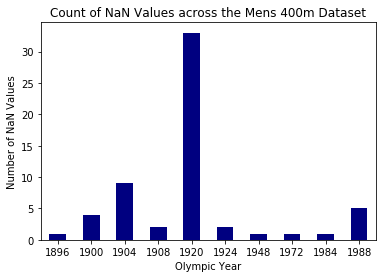

In [9]:
men_400m_df_null.plot(x='event_year',y=('participant','count'),kind='bar',rot=0,legend=None,color=(0,0,.5))
plt.xlabel("Olympic Year")
plt.ylabel("Number of NaN Values")
plt.title("Count of NaN Values across the Mens 400m Dataset")

According to this table and bar chart, there are some NaN values for participants' times every now and then. It looks to be more common in the first few Olympic games and there is a huge spike at the 1920 Antwerp games. No discernible pattern behind it though.

## Non-null values analysis

Let's do the same analysis for the non-null values and then calculate the variance to determine how close each of the races were

In [10]:
men_400m_df_nn = men_400m_df[men_400m_df['result'].notnull()] # clean out NaN results
men_400m_df_nn[men_400m_df_nn['location']=='Antwerp'].head() # quick check to see if NaN results removed

,participant,country,result,notes,location,event_year
6,Bevil Rudd,RSA,49.6,NaN,Antwerp,1920
7,Guy Butler,GBR,49.9,NaN,Antwerp,1920
8,Nils Engdahl,SWE,50.0,NaN,Antwerp,1920


In [11]:
result_count_df = men_400m_df_nn.groupby(['location','event_year']).agg({'participant':['count']}).reset_index().sort_values('event_year')
result_count_df

,location,event_year,participant
,,,count
2,Athens,1896,4
19,Paris,1900,2
24,St Louis,1904,3
9,London,1908,1
25,Stockholm,1912,5
1,Antwerp,1920,3
20,Paris,1924,4
0,Amsterdam,1928,6
12,Los Angeles,1932,6


Text(0.5,1,'Count of Timed Participants across the Mens 400m Dataset')

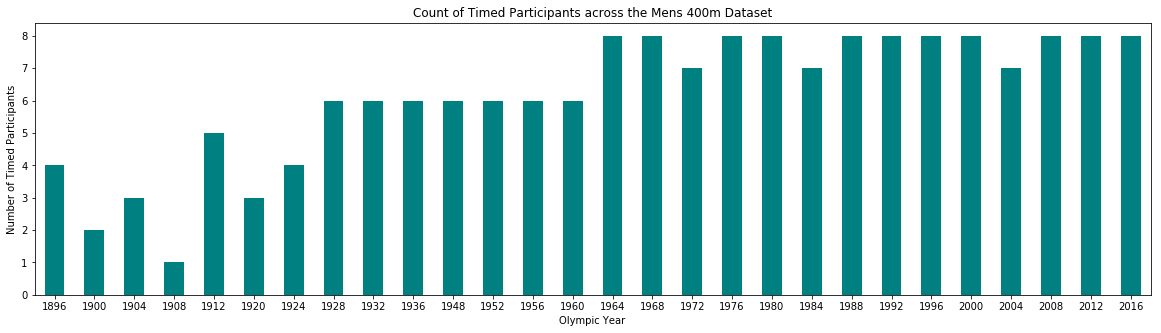

In [12]:
result_count_df.plot(x='event_year',y=('participant','count'),kind='bar',rot=0,legend=None,figsize=(20,5),color=(0,.5,.5))
plt.xlabel("Olympic Year")
plt.ylabel("Number of Timed Participants")
plt.title("Count of Timed Participants across the Mens 400m Dataset")

From this bar chart, we can see that we have more complete data in more recent Olympic years for the 400m dash versus what has been recorded in the early era of the modern games. London 1908 especially stands out as only the winner's time was recorded in this dataset!

# Variance Analysis

Now, we want to measure the competitiveness of each event. A way to do that is to calculate the variance of each event, which is a measure of the "spread" of values, or how close or far apart all the participants' times are. Close races should have the smallest variance.

In [13]:
agg_df = men_400m_df.groupby(['location','event_year']).agg({'result':['var']})
agg_df = agg_df.reset_index().sort_values('event_year')
agg_df.head()

,location,event_year,result
,,,var
2,Athens,1896,0.436667
19,Paris,1900,0.020000
24,St Louis,1904,0.190000
9,London,1908,NaN
25,Stockholm,1912,0.347000


Text(0.5,1,'Variance of the Mens 400m Dash')

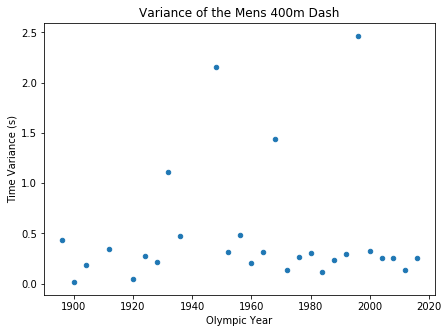

In [14]:
agg_df.plot(x='event_year',y=('result','var'),kind='scatter',figsize=(7,5))
plt.xlabel("Olympic Year")
plt.ylabel("Time Variance (s)")
plt.title("Variance of the Mens 400m Dash")

Some of these variances are much higher than the others. But recall that the number of participants with measured times varied depending on the year and that the later years had more usable data. Let's color code how many participants were in each year's event.

In [15]:
count_var_df = men_400m_df.groupby(['location','event_year']).agg({'result':['var','count']}).reset_index().sort_values('event_year')
count_var_df

location event_year    result      
                                         var count
2                Athens       1896  0.436667     4
19                Paris       1900  0.020000     2
24             St Louis       1904  0.190000     3
9                London       1908       NaN     1
25            Stockholm       1912  0.347000     5
1               Antwerp       1920  0.043333     3
20                Paris       1924  0.276667     4
0             Amsterdam       1928  0.214667     6
12          Los Angeles       1932  1.114667     6
7                Berlin       1936  0.478667     6
10               London       1948  2.158667     6
8              Helsinki       1952  0.317667     6
14  Melbourne-Stockholm       1956  0.485667     6
22                 Rome       1960  0.207000     6
27                Tokyo       1964  0.316964     8
15               Mexico       1968  1.442857     8
18               Munich       1972  0.139581     7
16             Montreal       1976  0.260155     8
17               Moscow       1980  0.305021     8
13          Los Angeles       1984  0.111357     7
23                Seoul       1988  0.231000     8
5             Barcelona       1992  0.298813     8
4               Atlanta       1996  2.463200     8
26               Sydney       2000  0.329143     8
3                Athens       2004  0.253762     7
6               Beijing       2008  0.255727     8
11               London       2012  0.139227     8
21                  Rio       2016  0.253571     8

Text(0.5,1,'Variance of the Mens 400m Dash')

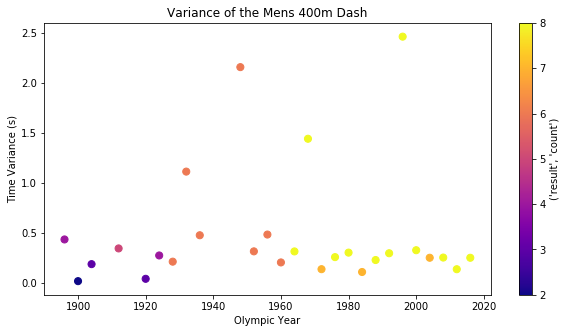

In [16]:
fig, ax = plt.subplots() # work-around to get x axis label to show
count_var_df.plot(x='event_year',y=('result','var'),c=('result','count'),cmap='plasma',kind='scatter',figsize=(10,5),s=50,ax=ax)
plt.xlabel("Olympic Year")
plt.ylabel("Time Variance (s)")
plt.title("Variance of the Mens 400m Dash")

Ah, here we go! Now we can see the variances plotted across the years and how many data points were included in each year. As seen before, the amount of data per group is larger and more complete in recent years versus the earlier years of the games. 

We actually have more outliers with some of the more complete data, which is to be expected as we are now including more than just the top 3 finishers in the 400m dash.

The average variance doesn't seem to vary all that much overall from the earliest to the latest 400m dashes. That is to say, the race has been about as competitive as it has always been. It's gotten a little more consistent since the 1970s though. Now, has the race gotten more consistent while the runners have been getting faster? Let's analysis the Gold Medal winners to see if this could be true.

# Analysis of Gold Medal Winners

In [17]:
winners_df = men_400m_df.groupby(['location','event_year']).first().reset_index().sort_values('event_year')
winners_df.head()

,location,event_year,participant,country,result,notes
2,Athens,1896,Thomas Burke,USA,54.2,Time estimated
19,Paris,1900,Maxwell Warburn Long,USA,49.4,Time estimated
24,St Louis,1904,Harry Hillman,USA,49.2,Olympic record
9,London,1908,John Cox Atlee,USA,50.4,NaN
25,Stockholm,1912,Charles Reidpath,USA,48.2,Olympic record


Text(0.5,1,'Gold Medal Winners of the Mens 400m Dash')

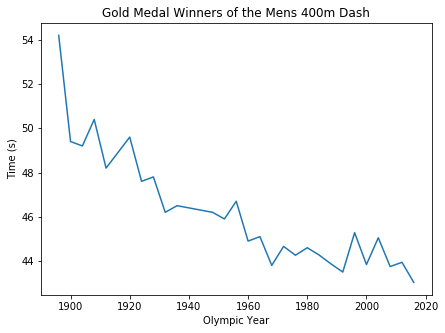

In [18]:
winners_df.plot(x='event_year',y='result',kind='line',legend=None,figsize=(7,5))
plt.xlabel("Olympic Year")
plt.ylabel("Time (s)")
plt.title("Gold Medal Winners of the Mens 400m Dash")

As we can see, there is some natural noise in the first place winners' times, but the trend if clearly going downward as each winner strives to beat the last winner's time. Thus, it seems to be true that although the 400m dash has been relatively consistent with respect to variance amongst the runners' times, they've been getting faster and faster thoughout the years.

# Conclusions

A few key points from my analysis:

* The number of participants was originally all over the place but after filtering out NaN results values, we can clearly see that our "data picture" is more complete over time as we have more usuable data in recent decades.
* No real patterns from the amount of NaN results but the amount of non-NaN results increased over time and eventually became consistent (about 7-8 usable data points per event/year grouping). Perhaps data collection became more consistent towards the end of the 1920s.
* The variance of each event was relatively consistent with the exception of a handful of outliers. Even with more data points, the variance is about the same as it always has been so the "competitiveness" of the 400m dash has been relatively constant.
* At the same time, the times of the gold medal winners has been on a downward trend. So the races have consistently close but the 400m dash runners have been getting faster over the years without much plateauing along the way (although it is to be noted that the event is only held at the summer Olympics once every 4 years). As expected from Olympic levels athletes!